# Sudoku puzzle solver

# 1.Backtracking Algorithm (Mahmoud Mohamed , Abdelrahman zakria)

In [1]:
#Backtracking Algorithm (Mahmoud Mohamed , Abdelrahman zakria)
def print_board(bo):
    for i in range(len(bo)):
        if i != 0 and i % int(len(bo)**0.5) == 0:
            print("- " * len(bo))
        for j in range(len(bo[0])):
            if j != 0 and j % int(len(bo[0])**0.5) == 0:
                print("|", end=" ")
            if j == len(bo[0]) - 1:
                print(bo[i][j])
            else:
                print(str(bo[i][j]) + " ", end="")

In [2]:
#Backtracking Algorithm (Mahmoud Mohamed , Abdelrahman zakria)
def find_empty(bo):
    for i in range(len(bo)):
        for j in range(len(bo[0])):
            if bo[i][j] == 0:
                return (i, j)
    return None

In [3]:
#Backtracking Algorithm (Mahmoud Mohamed , Abdelrahman zakria)
def valid(bo, num, pos):
    # Check row
    for i in range(len(bo[0])):
        if bo[pos[0]][i] == num and pos[1] != i:
            return False
    # Check column
    for i in range(len(bo)):
        if bo[i][pos[1]] == num and pos[0] != i:
            return False
    # Check square
    box_size = int(len(bo)**0.5)
    start_row = pos[0] // box_size * box_size
    start_col = pos[1] // box_size * box_size
    for i in range(start_row, start_row + box_size):
        for j in range(start_col, start_col + box_size):
            if bo[i][j] == num and (i, j) != pos:
                return False
    return True

In [4]:
#Backtracking Algorithm (Mahmoud Mohamed , Abdelrahman zakria)
def solve(bo, iteration_count=0):
    find = find_empty(bo)
    if not find:
        return True, iteration_count
    else:
        row, col = find
    for i in range(1, len(bo) + 1):
        iteration_count += 1
        if valid(bo, i, (row, col)):
            bo[row][col] = i
            print(":\n")
            print_board(bo)
            if solve(bo, iteration_count)[0]:
                return True, iteration_count
            bo[row][col] = 0
    return False, iteration_count


In [5]:
#Backtracking Algorithm (Mahmoud Mohamed , Abdelrahman zakria)
def is_valid_board(bo):
    for i in range(len(bo)):
        for j in range(len(bo[0])):
            if bo[i][j] != 0 and not valid(bo, bo[i][j], (i, j)):
                return False
    return True

In [6]:
#Backtracking Algorithm (Mahmoud Mohamed , Abdelrahman zakria)
def choose_board():
    print("Choose the size of the Sudoku board:")
    print("1. 4x4")
    print("2. 6x6")
    print("3. 9x9")
    choice = input("Enter your choice (1/2/3): ")
    if choice == '1':
        return board_4x4
    elif choice == '2':
        return board_6x6
    elif choice == '3':
        return board_9x9
    else:
        print("Invalid choice. Please enter 1, 2, or 3.")
        return choose_board()

In [7]:
#Backtracking Algorithm (Mahmoud Mohamed , Abdelrahman zakria)
def choose_input_method():
    print("How would you like to input the Sudoku board?")
    print("1. Manually enter the board")
    print("2. Choose from pre-existing boards")
    choice = input("Enter your choice (1/2): ")
    if choice == '1':
        return input_board_manually()
    elif choice == '2':
        return choose_board()
    else:
        print("Invalid choice. Please enter 1 or 2.")
        return choose_input_method()


In [8]:
#Backtracking Algorithm (Mahmoud Mohamed , Abdelrahman zakria)
def input_board_manually():
    print("Enter the Sudoku board row by row. Use '0' for empty cells.")
    size = int(input("Enter the size of the board (e.g., 4 for 4x4): "))
    board = []
    for _ in range(size):
        row = input().strip().split()
        if len(row) != size:
            print("Invalid input. Please enter exactly", size, "numbers or '0' for empty cells.")
            return input_board_manually()
        board.append([int(cell) if cell != '0' else 0 for cell in row])  # Replace '0' with 0
    return board

In [9]:
#Backtracking Algorithm (Mahmoud Mohamed , Abdelrahman zakria)
board_9x9 = [
    [1, 4, 0, 0, 3, 0, 0, 7, 9],
    [0, 0, 0, 0, 0, 2, 0, 0, 0],
    [0, 7, 0, 9, 0, 0, 0, 6, 0],
    [0, 0, 1, 0, 0, 0, 2, 4, 3],
    [5, 0, 4, 0, 6, 0, 8, 0, 0],
    [0, 0, 9, 8, 0, 0, 0, 0, 1],
    [2, 0, 0, 5, 0, 4, 0, 0, 0],
    [0, 6, 0, 0, 9, 7, 1, 0, 0],
    [3, 0, 5, 0, 0, 0, 0, 8, 0]
]

board_6x6 = [
    [2, 0, 0, 0, 3, 5],
    [0, 0, 0, 1, 0, 4],
    [0, 2, 0, 0, 5, 0],
    [0, 4, 5, 0, 6, 1],
    [4, 5, 0, 3, 0, 0],
    [0, 3, 1, 5, 4, 2],
]

board_4x4 = [
    [0, 0, 1, 0],
    [2, 0, 0, 0],
    [0, 0, 0, 3],
    [0, 4, 0, 0],
]

In [10]:
#Backtracking Algorithm (Mahmoud Mohamed , Abdelrahman zakria)
print("Welcome to Sudoku Solver!")
board = choose_input_method()

print("\nSudoku Puzzle:")
print_board(board)
print("\nSolving...")

solved, iterations = solve(board)
if solved and is_valid_board(board):
    print("\nSolution:")
    print_board(board)
    print("\nNumber of iterations:", iterations)
else:
    print("\nNo feasible solution exists for this Sudoku puzzle.")

Welcome to Sudoku Solver!
How would you like to input the Sudoku board?
1. Manually enter the board
2. Choose from pre-existing boards


Enter your choice (1/2):  2


Choose the size of the Sudoku board:
1. 4x4
2. 6x6
3. 9x9


Enter your choice (1/2/3):  3



Sudoku Puzzle:
1 4 0 | 0 3 0 | 0 7 9
0 0 0 | 0 0 2 | 0 0 0
0 7 0 | 9 0 0 | 0 6 0
- - - - - - - - - 
0 0 1 | 0 0 0 | 2 4 3
5 0 4 | 0 6 0 | 8 0 0
0 0 9 | 8 0 0 | 0 0 1
- - - - - - - - - 
2 0 0 | 5 0 4 | 0 0 0
0 6 0 | 0 9 7 | 1 0 0
3 0 5 | 0 0 0 | 0 8 0

Solving...
:

1 4 2 | 0 3 0 | 0 7 9
0 0 0 | 0 0 2 | 0 0 0
0 7 0 | 9 0 0 | 0 6 0
- - - - - - - - - 
0 0 1 | 0 0 0 | 2 4 3
5 0 4 | 0 6 0 | 8 0 0
0 0 9 | 8 0 0 | 0 0 1
- - - - - - - - - 
2 0 0 | 5 0 4 | 0 0 0
0 6 0 | 0 9 7 | 1 0 0
3 0 5 | 0 0 0 | 0 8 0
:

1 4 2 | 6 3 0 | 0 7 9
0 0 0 | 0 0 2 | 0 0 0
0 7 0 | 9 0 0 | 0 6 0
- - - - - - - - - 
0 0 1 | 0 0 0 | 2 4 3
5 0 4 | 0 6 0 | 8 0 0
0 0 9 | 8 0 0 | 0 0 1
- - - - - - - - - 
2 0 0 | 5 0 4 | 0 0 0
0 6 0 | 0 9 7 | 1 0 0
3 0 5 | 0 0 0 | 0 8 0
:

1 4 2 | 6 3 5 | 0 7 9
0 0 0 | 0 0 2 | 0 0 0
0 7 0 | 9 0 0 | 0 6 0
- - - - - - - - - 
0 0 1 | 0 0 0 | 2 4 3
5 0 4 | 0 6 0 | 8 0 0
0 0 9 | 8 0 0 | 0 0 1
- - - - - - - - - 
2 0 0 | 5 0 4 | 0 0 0
0 6 0 | 0 9 7 | 1 0 0
3 0 5 | 0 0 0 | 0 8 0
:

1 4 2 | 6 3 8 | 

# 2.Genetic Algorithm (Mohamed hani,Mohamed wafiq)

In this project, the aim is to solve a sudoku puzzle using the genetic algorithm

In [2]:
import random as random
import time

In [23]:
#mohamed wafiq
print("Welcome to Sudoku Solver \U0001F642 \n")


fsize = int(input("Enter the size of Sudoku grid (e.g., 3 for 3*3  ,  4 for 4x4  ,  5 for 5*5  ,  9 for 9x9 etc.....) : \n"))

print ("Select a choice ")
choice = int(input(" if you want to enter your own soduko press (1) if you want choose from exiting onr press (2)\n "))
user_soduko = []
if choice == 1:
   print("-enter your soduko Taking into account the following")
   print("-first, you must adhere to the size of the Sudoku that was chosen above")
   print("-Second, in the empty cells add  0s : ")
   print("-Third, The input process is row by row so take care about the arrangement \n")
   for u in range(fsize):
         rows = u+1
         print("enter row number : " + " " + str(rows))
         row = list(map(int, input().split()))
         user_soduko.append(row)
   print (user_soduko)
   with open('/content/saving', 'w') as f:
    f.write("[")
    for line in user_soduko:
        f.write(f"{line},\n")
    f.write("]")
    log = open("/content/saving", "r")
    print(log.read())
elif choice == 2:
     print("we will choose an pre existing soduko set with the size you choose: ")

Welcome to Sudoku Solver 🙂 

Enter the size of Sudoku grid (e.g., 3 for 3*3  ,  4 for 4x4  ,  5 for 5*5  ,  9 for 9x9 etc.....) : 
9
Select a choice 
 if you want to enter your own soduko press (1) if you want choose from exiting onr press (2)
 2
we will choose an pre existing soduko set with the size you choose: 


## Part 1: Defining Genes and Chromosomes

A gene is the value of a row and is a permutation of set {1 ... 9}. A chromosome consists of 9 genes, each gene representing a row of the actual sudoku puzzle.

In [3]:

def make_gene(initial=None):
    if initial is None:
        initial = [0] * fsize
    mapp = {}
    gene = list(range(1, fsize + 1))
    random.shuffle(gene)
    for i in range(fsize):
        mapp[gene[i]] = i
    for i in range(fsize):
        if initial[i] != 0 and gene[i] != initial[i]:
            temp = gene[i], gene[mapp[initial[i]]]
            gene[mapp[initial[i]]], gene[i] = temp
            mapp[initial[i]], mapp[temp[0]] = i, mapp[initial[i]]
    return gene

In [4]:
def make_chromosome(initial=None):
    if initial is None:
        initial = [[0] * fsize] * fsize
    chromosome = []
    for i in range(fsize):
        chromosome.append(make_gene(initial[i]))
    return chromosome

## Part 2: Making First Generation

In this part, a function is implemented to randomly create a population.

In [5]:
def make_population(count, initial=None):
    if initial is None:
        initial = [[0] * fsize] * fsize
    population = []
    for _ in range(count):
        population.append(make_chromosome(initial))
    return population

## Part 3: Fitness Function

The fitness function calculates how "fit" a chromosome (puzzle) is based on:
- For each column: Subtract (number of times a number is seen) - 1 from the fitness for that number
- For each 3x3 square: Subtract (number of times a number is seen) - 1 from the fitness for that number
The higher the fitness, the closer the puzzle is to being solved.

In [6]:
def get_fitness(chromosome):
    """Calculate the fitness of a chromosome (puzzle)."""
    fitness = 0
    for i in range(fsize): # For each column
        seen = {}
        for j in range(fsize): # Check each cell in the column
            if chromosome[j][i] in seen:
                seen[chromosome[j][i]] += 1
            else:
                seen[chromosome[j][i]] = 1
        for key in seen: # Subtract fitness for repeated numbers
            fitness -= (seen[key] - 1)
    for m in range(fsize // 3): # For each 3x3 square
        for n in range(fsize // 3):
            seen = {}
            for i in range(3 * n, 3 * (n + 1)):  # Check cells in 3x3 square
                for j in range(3 * m, 3 * (m + 1)):
                    if chromosome[j][i] in seen:
                        seen[chromosome[j][i]] += 1
                    else:
                        seen[chromosome[j][i]] = 1
            for key in seen: # Subtract fitness for repeated numbers
                fitness -= (seen[key] - 1)
    return fitness


In [7]:
ch = make_chromosome()
print(get_fitness(ch))


def pch(ch):
    for i in range(fsize):
        for j in range(fsize):
            print(ch[i][j], end=" ")
        print("")

-54


## Part 4: Crossover and Mutation

In this part, the crossover and mutation function is implemented to help in determining the next generation.

### Crossover

the crossover function takes two chromosomes as input and makes two new chromosomes by combining them. This crossover function decides the parent of each gene separately, so the result is independent of the location of the genes.

In [8]:
def crossover(ch1, ch2):
    new_child_1 = []
    new_child_2 = []
    for i in range(9):
        x = random.randint(0, 1)
        if x == 1:
            new_child_1.append(ch1[i])
            new_child_2.append(ch2[i])
        elif x == 0:
            new_child_2.append(ch1[i])
            new_child_1.append(ch2[i])
    return new_child_1, new_child_2

### Mutation

In [9]:
def mutation(ch, pm, initial):
    for i in range(fsize):
        x = random.randint(0, 100)
        if x < pm * 100:
            ch[i] = make_gene(initial[i])
    return ch

Read the puzzle from the given address


In [10]:
def read_puzzle(address):
    puzzle = []
    f = open(address, 'r')
    for row in f:
        temp = row.split()
        puzzle.append([int(c) for c in temp])
    return puzzle

Get the mating pool using the random method

In [11]:
def r_get_mating_pool(population):
    fitness_list = []
    pool = []
    for chromosome in population:
        fitness = get_fitness(chromosome)
        fitness_list.append((fitness, chromosome))
    fitness_list.sort()
    weight = list(range(1, len(fitness_list) + 1))
    for _ in range(len(population)):
        ch = random.choices(fitness_list, weight)[0]
        pool.append(ch[1])
    return pool


Get the mating pool using the weighted method

In [12]:
def w_get_mating_pool(population):
    fitness_list = []
    pool = []
    for chromosome in population:
        fitness = get_fitness(chromosome)
        fitness_list.append((fitness, chromosome))
    weight = [fit[0] - fitness_list[0][0] for fit in fitness_list]
    for _ in range(len(population)):
        ch = random.choices(fitness_list, weights=weight)[0]
        pool.append(ch[1])
    return pool


Generate the offsprings from the mating pool

In [13]:
def get_offsprings(population, initial, pm, pc):
    new_pool = []
    i = 0
    while i < len(population):
        ch1 = population[i]
        ch2 = population[(i + 1) % len(population)]
        x = random.randint(0, 100)
        if x < pc * 100:
            ch1, ch2 = crossover(ch1, ch2)
        new_pool.append(mutation(ch1, pm, initial))
        new_pool.append(mutation(ch2, pm, initial))
        i += 2
    return new_pool

In [20]:
# Population size
POPULATION = 1000
# Number of generations
REPETITION = 1000
# Probability of mutation
PM = 0.1
# Probability of crossover
PC = 0.95
# Main genetic algorithm function after editing its structure and make it shows the proccess of solving sodko
def genetic_algorithm(initial_file): #mohamed hani
    initial = read_puzzle(initial_file)
    population = make_population(POPULATION, initial)
    generation_count = 0
    while generation_count < REPETITION:
        mating_pool = r_get_mating_pool(population)
        random.shuffle(mating_pool)
        population = get_offsprings(mating_pool, initial, PM, PC)
        best_chromosome = None
        best_fitness = -float('inf')
        for chromosome in population:
            fitness = get_fitness(chromosome)
            if fitness > best_fitness:
                best_fitness = fitness
                best_chromosome = chromosome
        print("Generation:", generation_count + 1, "Best Fitness:", best_fitness)
        pch(best_chromosome)
        generation_count += 1
        if best_fitness == 0:
            print("Solution found in generation:", generation_count)
            return best_chromosome, generation_count
    print("No solution found after", REPETITION, "generations.")
    return best_chromosome, generation_count



def original_genetic_algorithm(initial_file):#mohamed wafiq
    initial = read_puzzle(initial_file)
    population = make_population(POPULATION, initial)
    for _ in range(REPETITION):
        mating_pool = r_get_mating_pool(population)
        random.shuffle(mating_pool)
        population = get_offsprings(mating_pool, initial, PM, PC)
        fit = [get_fitness(c) for c in population]
        m = max(fit)
        if m == 0:
            return population
    return population

Run the algorithm and time it

In [24]:
#mohamed wafiq
tic = time.time()
filepath = "/content/Test22.txt"

toc = time.time()
# Print the chromosome with the highest fitness
print("please choose one option : \n ")
uchooose = int(input("If you want to view the full solution details, press (1) /// if you want to view the final solution press (2)"))
if int(uchooose) == 1:
   r = genetic_algorithm(filepath)
   fit2 = [get_fitness(c) for c in r]
   m2 = max(fit)
   print(max(fit))
   for c in r:
    if get_fitness(c) == m:
        pch(c)
        break

elif int(uchooose) == 2:
     R = original_genetic_algorithm(filepath)
     fit = [get_fitness(c) for c in R]
     m = max(fit)
     print(max(fit))

     print("time_taken: ", toc - tic)

     log = open(filepath, "r")
     print("the original soduko")
     print(log.read())
     print("   \n  ")
     print("the soduko after solving it by genetic algorithm")
     for c in R:
      if get_fitness(c) == m:
          pch(c)
          break

please choose one option : 
 
If you want to view the full solution details, press (1) /// if you want to view the final solution press (2)1
Generation: 1 Best Fitness: -35
8 4 6 9 3 5 1 2 7 
4 1 3 6 7 2 9 5 8 
7 5 3 1 2 4 8 9 6 
7 9 4 8 1 2 6 3 5 
2 4 7 8 6 3 5 9 1 
1 7 6 5 3 9 4 8 2 
3 5 1 2 4 8 7 6 9 
2 8 3 7 9 6 5 1 4 
5 7 6 9 1 2 3 8 4 
Generation: 2 Best Fitness: -31
8 4 6 3 2 9 1 5 7 
7 1 8 6 5 2 3 4 9 
9 5 3 7 1 4 8 2 6 
7 5 4 8 1 2 6 3 9 
7 2 6 4 3 1 8 9 5 
1 9 3 5 7 8 4 6 2 
8 3 1 2 4 5 7 6 9 
2 3 5 7 9 6 8 1 4 
4 7 6 3 1 5 9 8 2 
Generation: 3 Best Fitness: -30
8 2 6 5 4 9 1 3 7 
4 7 3 6 5 2 9 1 8 
1 5 3 7 9 4 8 2 6 
7 1 4 8 2 9 6 3 5 
3 4 5 1 6 7 2 9 8 
1 9 2 5 3 8 4 6 7 
4 3 1 2 8 5 7 6 9 
2 3 8 4 9 6 5 1 7 
6 7 9 4 1 5 3 8 2 
Generation: 4 Best Fitness: -30
8 3 6 9 5 2 1 4 7 
9 1 7 6 8 2 4 3 5 
2 5 3 7 1 4 8 9 6 
7 2 4 8 9 1 6 3 5 
4 6 8 5 3 1 7 9 2 
1 9 2 5 7 6 4 8 3 
6 3 1 2 4 8 7 5 9 
2 4 8 7 9 6 5 1 3 
9 7 5 3 1 4 2 8 6 
Generation: 5 Best Fitness: -27
8 2 6 4 9 3 1 5

KeyboardInterrupt: 

In [19]:
#mohamed hani
def print_grid(grid):
    for row in grid:
        print(" ".join(map(str, row)))


def is_safe(grid, row, col, num):

    if num in grid[row]:
        return False


    if num in [grid[i][col] for i in range(fsize)]:
        return False


    start_row, start_col = 3 * (row // 3), 3 * (col // 3)
    for i in range(3):
        for j in range(3):
            if grid[i + start_row][j + start_col] == num:
                return False

    return True


def find_empty_location(grid):
    for i in range(fsize):
        for j in range(fsize):
            if grid[i][j] == 0:
                return i, j
    return None, None


def solve_sudoku(grid):
    row, col = find_empty_location(grid)


    if row is None and col is None:
        return True

    for num in range(1, fsize+1):
        if is_safe(grid, row, col, num):
            grid[row][col] = num
            print("Placed", num, "at", (row, col))
            print_grid(grid)
            print("---------------------")


            if solve_sudoku(grid):
                return True


            grid[row][col] = 0


    return False


# Example Sudoku grid
grid = [[1, 2, 0, 6],
[0, 2, 4, 5],
[3, 4, 5, 0],
[4, 5, 0, 0],
]
print("Original Sudoku:")
print_grid(grid)
print("---------------------")
print("Solving Sudoku:")
solve_sudoku(grid)
print("Sudoku Solved:")
print_grid(grid)


Original Sudoku:
1 2 0 6
0 2 4 5
3 4 5 0
4 5 0 0
---------------------
Solving Sudoku:
Sudoku Solved:
1 2 0 6
0 2 4 5
3 4 5 0
4 5 0 0


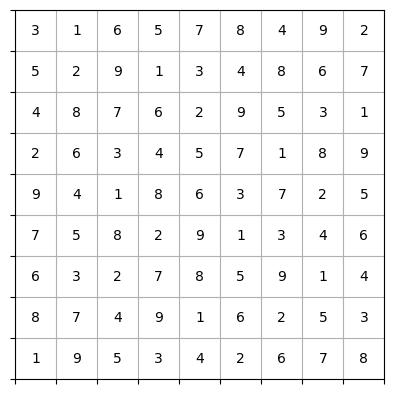

In [25]:
#mohamed hani
import matplotlib.pyplot as plt

def plot_sudoku(board):
    fig, ax = plt.subplots()
    ax.set_xticks(range(10))
    ax.set_yticks(range(10))
    ax.grid(which='both')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect('equal')

    for i in range(9):
        for j in range(9):
            if board[i][j] != 0:
                ax.text(j + 0.5, 8.5 - i, str(board[i][j]), ha='center', va='center')

    plt.show()


board = [
    [3, 1, 6, 5, 7, 8, 4, 9, 2],
    [5, 2, 9, 1, 3, 4, 8, 6, 7],
    [4, 8, 7, 6, 2, 9, 5, 3, 1],
    [2, 6, 3, 4, 5, 7, 1, 8, 9],
    [9, 4, 1, 8, 6, 3, 7, 2, 5],
    [7, 5, 8, 2, 9, 1, 3, 4, 6],
    [6, 3, 2, 7, 8, 5, 9, 1, 4],
    [8, 7, 4, 9, 1, 6, 2, 5, 3],
    [1, 9, 5, 3, 4, 2, 6, 7, 8]
]

plot_sudoku(board)


## Problems with Genetic Algorithm

The algorithm may encounter a challenge when it becomes trapped at a local maximum and the desired solution, such as in a Sudoku problem, cannot be achieved. One approach to address this issue is to initially increase the mutation rate, although this can have its own drawbacks as mentioned earlier. Alternatively, a function can be defined to identify local maximums, such as by detecting repeated values, and in such cases, the mutation rate can be increased. Another solution involves increasing the population size or the number of iterations the algorithm runs. Modifying the fitness function or changing the method for selecting individuals in the mating pool are additional strategies. Overall, since the algorithm's nature involves randomness, it is possible to encounter this problem regardless of the chosen method, but running the algorithm multiple times can sometimes be helpful.